# Intro to Information Retrieval
TA: Parsa KamaliPour
session 6

### simple handmade stemmer

In [26]:
def handmade_stemmer(list_of_words):
    return_list = []
    for word in list_of_words:
        for suffix in ['s', 'ed', 'ing', 'ies']:
            if word.endswith(suffix):
                return_list.append(word[:-len(suffix)])
    return return_list

In [27]:
some_words = ['try', 'ties', 'tied', 'cities', 'city', 'bed', 'ended']
stemmized_words = handmade_stemmer(some_words)
print(stemmized_words)

['tie', 't', 'ti', 'citie', 'cit', 'b', 'end']


## Porter Stemmer

In [28]:
from nltk.stem import PorterStemmer

In [29]:
porter = PorterStemmer()
print(some_words)
porter_results = [porter.stem(x) for x in some_words]
print(porter_results)

['try', 'ties', 'tied', 'cities', 'city', 'bed', 'ended']
['tri', 'tie', 'tie', 'citi', 'citi', 'bed', 'end']


In [30]:
some_words_2 = ['bed', 'kiss',
         'tied', 'tis',
         'universal', 'university',
         'experiment', 'experience',
         'past', 'paste',
         'alumnus', 'alumni',
         'adhere', 'adhesion',
         'create', 'creation']
porter_results_2 = [porter.stem(x) for x in some_words_2]
print(porter_results_2)

['bed', 'kiss', 'tie', 'ti', 'univers', 'univers', 'experi', 'experi', 'past', 'past', 'alumnu', 'alumni', 'adher', 'adhes', 'creat', 'creation']


## WordNet Lemmatizer

In [31]:
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\parsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\parsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
lem = WordNetLemmatizer()
lem_results = [lem.lemmatize(x) for x in some_words_2]

In [34]:
print('%15s\t%15s\t%15s' % ('original', 'porter', 'lemmatizer'))
print('\n')
print('\n'.join(['%15s\t%15s\t%15s' % (t[0], t[1], t[2])
                 for t in zip(some_words_2, porter_results_2, lem_results)]))

       original	         porter	     lemmatizer


            bed	            bed	            bed
           kiss	           kiss	           kiss
           tied	            tie	           tied
            tis	             ti	             ti
      universal	        univers	      universal
     university	        univers	     university
     experiment	         experi	     experiment
     experience	         experi	     experience
           past	           past	           past
          paste	           past	          paste
        alumnus	         alumnu	        alumnus
         alumni	         alumni	        alumnus
         adhere	          adher	         adhere
       adhesion	          adhes	       adhesion
         create	          creat	         create
       creation	       creation	       creation


## Inverted_index

In [35]:
Inverted_index = {
    'Cat':[2,4,8,16,19,23,28,43],
    'Dog':[1,2,3,5,8,41,51,60,71]
}

## merge two posting lists

In [36]:
def intersect(postlist1, postlist2):
    answer = []
    p1, p2 = 0,0
    p1_size, p2_size = len(postlist1), len(postlist2)
    while p1 < p1_size and p2 < p2_size:
        if postlist1[p1] == postlist2[p2]:
            answer.append(postlist1[p1])
            p1 += 1
            p2 += 1
        elif postlist1[p1] < postlist2[p2]:
            p1 += 1
        else:
            p2 += 1

    return answer

In [37]:
merge_res = intersect(Inverted_index['Cat'], Inverted_index['Dog'])
print(merge_res)

[2, 8]


## Phrase queries

In [42]:
docs = [line.strip() for line in open("documents.txt", 'rt').readlines()]
print(docs)

['What did the little boy tell the game warden?     His dad was in the kitchen poaching eggs!', 'What do you call a chicken crossing the road?     Poultry in motion.', 'What do you call it when a cat sues another cat?     A Clawsuit.', 'What does an envelope say when you lick it?     Nothing. It just shuts up.', 'How can you tell the ocean is friendly?     It waves.', "What's black, white, green and bumpy?     A pickle wearing a tuxedo", 'When was meat so high?     When the cow jumped over the moon.', 'What happened to the wind?     It blew away', 'What starts with "T", is full of "T", and ends with "T"?     A teapot.', "What is a hermit?     A girl's baseball glove.", 'What does a television have in common with a rabbit?     His ears!', 'What did the crop say to the farmer?     Why are you always picking on me?', 'What did the guy say when he walked into the bar?     Ouch.', 'How is a locksmith like a typewritter?     They both have a lot of keys!', 'What has four legs and goes booo? 

In [43]:
def n_grams(n, docs):
    terms = set()
    for doc in docs:
        tokens = doc.split()
        for i in range(len(tokens) - n + 1):
            terms.add("_".join(tokens[i:i+n]))
    return terms

In [45]:
print(n_grams(1, ['a b c']))
print(n_grams(2, ['a b c']))
print(n_grams(3, ['a b c']))
print(n_grams(4, ['a b c']))

{'a', 'b', 'c'}
{'a_b', 'b_c'}
{'a_b_c'}
set()


In [46]:
max_n = 20
sizes = [len(n_grams(i, docs)) for i in range(1, max_n)]
print('number of terms=')
list(zip(range(1, max_n), sizes))

number of terms=


[(1, 380),
 (2, 585),
 (3, 599),
 (4, 567),
 (5, 511),
 (6, 452),
 (7, 391),
 (8, 330),
 (9, 272),
 (10, 221),
 (11, 172),
 (12, 129),
 (13, 90),
 (14, 61),
 (15, 40),
 (16, 28),
 (17, 22),
 (18, 17),
 (19, 14)]

In [47]:
max_n = 20
gram = [n_grams(i, docs) for i in range(1, max_n)]
list(zip(range(1, max_n), gram))

[(1,
  {'"Elvis',
   '"T",',
   '"T"?',
   "'Flipper'?",
   '10',
   'A',
   'An',
   'Arnold',
   'Because',
   'Beef',
   'Check',
   'Chuck',
   'Cinderella',
   'Clawsuit.',
   'Climb',
   'Did',
   "Don't",
   'Everyone',
   'Flies.',
   'France,',
   'French',
   'He',
   'His',
   'Hot.',
   'Hound.',
   'How',
   'If',
   'In',
   'Incorrectly.',
   'It',
   'Late',
   'Launch',
   'Lemon.',
   "Let's",
   'Lone',
   'Look',
   'Lost',
   'No,',
   'Nothing.',
   'Ouch.',
   'Parsley!!"',
   'Petal',
   'Poultry',
   'Purr-ple',
   'Saturday',
   'She',
   'Short-sineger',
   'Sunday.',
   'Take',
   'The',
   'They',
   'Time',
   'To',
   'Too',
   'What',
   "What's",
   'When',
   'Where',
   'Which',
   'Who',
   'Why',
   'Wood.',
   'Yesterday!',
   'You',
   'a',
   'across',
   'act',
   'afraid',
   'again?',
   'always',
   'an',
   'and',
   'another',
   'are',
   'armadillo',
   'astronauts',
   'automobile.',
   'away',
   'back',
   'ball',
   'ball?',
   'banan

[380, 965, 1564, 2131, 2642, 3094, 3485, 3815, 4087, 4308, 4480, 4609, 4699, 4760, 4800, 4828, 4850, 4867, 4881]


Text(0, 0.5, 'number of terms')

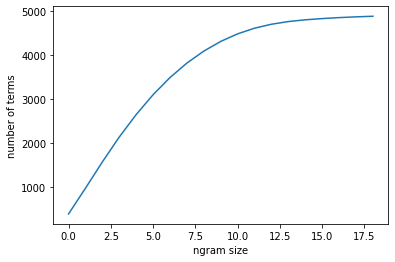

In [52]:
import matplotlib
%matplotlib inline
# 1-grams, 1-grams + 2-grams, ...
x = [sum(sizes[:i]) for i in range(1,max_n)]
print(x)
plot(x)
xlabel('ngram size')
ylabel('number of terms')